# Contact detect

## Importing Library and module

In [1]:
import sys
import numpy as np

In [2]:
PYTHONTOOLSDIR = r"C:\Users\pramod.kumar\OneDrive - SIEMENSGAMESA\Work\ProjectPyAnsys"

sys.path.append(PYTHONTOOLSDIR)

import py_apdl_pre as pre

PyMAPDL is taking longer than expected to connect to an MAPDL session.
Checking if there are any available licenses...
Product:             Ansys Mechanical Enterprise
MAPDL Version:       22.2
ansys.mapdl Version: 0.65.2



In [3]:
PYTHONTOOLSDIR = r"C:\Users\pramod.kumar\OneDrive - SIEMENSGAMESA\Work\ContactDetect"
sys.path.append(PYTHONTOOLSDIR)
import ContactDetection as cd

In [4]:
dir(cd)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'check_collinear',
 'check_coplaner',
 'check_normal',
 'circle_center_radius',
 'coordinate_dcm',
 'dcm2angleZXY',
 'dcv',
 'np',
 'perpendicular_vector',
 'vector_spred',
 'vectors_angle_3d']

In [5]:
dir(pre)

['PYTHONTOOLSDIR',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'area21_kp_vector',
 'area_cent',
 'cd',
 'check_overlap',
 'clocal_area',
 'contact_between_cm',
 'launch_mapdl',
 'mapdl',
 'np',
 'paraimport',
 'pd',
 'pv',
 'sys']

In [6]:
# help(cd)

In [7]:
print(pre.paraimport.__doc__)

Import a parametric solid into a APDL and create component.

    Args:
        paraname (str): The name of the parametric solid.
        parapath (str): The path to the parametric solid file.
        cmname (str): The name of the component to create in the APDL

    Returns:
        None.

    


In [8]:
print(pre.area_cent.__doc__)

This function takes a list of area numbers as input and returns the centroid of the areas and area val.

    The centroid is calculated by first summing the x, y, and z coordinates of all the areas in the list.
    The average of these sums is then returned as the centroid.

    Args:
        a_num (list):list of area numbers

    Returns:
        List of the centroid coordinate x, y, and z 

    


In [9]:
mapdl = pre.mapdl

## Setting working directory and jobname

In [10]:
mapdl.db.clear()

CLEAR MAPDL DATABASE AND RESTART

 Ansys Mechanical Enterprise

In [11]:
# dirpath="K:\\Users\\pramod.kumar\\Sandbox\\PyAnsys\\01"
dirpath = r"C:\Users\pramod.kumar\Music\contct_detect"
jobname = "MDT"
pre.mapdl.cwd(dirpath=dirpath)
pre.mapdl.filname(fname=jobname, key=1)

CURRENT JOBNAME REDEFINED AS MDT
     Opening new LOG, ERROR, LOCK and PAGE FILES

In [12]:
# q = mapdl.queries
# q.vsel(v1)
# mapdl.vsel('NONE')
# q.vsel(v1)
# q.vsel(0)

In [13]:
mapdl.title(title="Contact Detect Trial")

TITLE= 
 Contact Detect Trial

In [14]:
# mapdl.stitle(nline=1, title='Detect')

In [15]:
# mapdl.stitle(nline='2', title='Test')

In [16]:
# mapdl.stitle(nline='3', title='Trial')

In [17]:
mapdl.prep7()

*** MAPDL - ENGINEERING ANALYSIS SYSTEM  RELEASE 2022 R2          22.2     ***
 Ansys Mechanical Enterprise                       
 00000000  VERSION=WINDOWS x64   18:29:20  SEP 04, 2023 CP=      0.641

 Contact Detect Trial                                                          



          ***** MAPDL ANALYSIS DEFINITION (PREP7) *****

In [18]:
print(mapdl.version)
print(mapdl.directory)
print(mapdl.jobname)

22.2
C:/Users/pramod.kumar/Music/contct_detect
MDT


## Imprting parasolid and creating cm

In [19]:
cmname = "part1"
paraname = "Body1"
parapath = (
    r"C:\Users\pramod.kumar\OneDrive - SIEMENSGAMESA\Work\ContactDetect\pyAnsysMAPDL"
)
pre.paraimport(paraname, parapath, cmname)

Body1 imported as component part1 with vlum num [1]


In [20]:
cmname = "part2"
paraname = "Body2"
parapath = (
    r"C:\Users\pramod.kumar\OneDrive - SIEMENSGAMESA\Work\ContactDetect\pyAnsysMAPDL"
)
pre.paraimport(paraname, parapath, cmname)

Body2 imported as component part2 with vlum num [2]


In [21]:
cmname = "part3"
paraname = "Body3"
parapath = (
    r"C:\Users\pramod.kumar\OneDrive - SIEMENSGAMESA\Work\ContactDetect\pyAnsysMAPDL"
)
pre.paraimport(paraname, parapath, cmname)

Body3 imported as component part3 with vlum num [3]


In [22]:
cmname = "part4"
paraname = "Body4"
parapathath = (
    r"C:\Users\pramod.kumar\OneDrive - SIEMENSGAMESA\Work\ContactDetect\pyAnsysMAPDL"
)
pre.paraimport(paraname, parapath, cmname)

Body4 imported as component part4 with vlum num [4]


In [23]:
cmname = "part5"
paraname = "Body5"
parapath = (
    r"C:\Users\pramod.kumar\OneDrive - SIEMENSGAMESA\Work\ContactDetect\pyAnsysMAPDL"
)
pre.paraimport(paraname, parapath, cmname)

Body5 imported as component part5 with vlum num [5]


In [24]:
cmname = "part6"
paraname = "Body6"
parapath = (
    r"C:\Users\pramod.kumar\OneDrive - SIEMENSGAMESA\Work\ContactDetect\pyAnsysMAPDL"
)
pre.paraimport(paraname, parapath, cmname)

Body6 imported as component part6 with vlum num [6]


In [25]:
mapdl.reset()

PLOTTING DEFAULTS RESET

In [26]:
mapdl.replot()

*** NOTE *** Display device has not yet been specified with the /SHOW command.  Display commands ignored.

In [27]:
mapdl.prep7()

You have already entered the general preprocessor (PREP7).

In [28]:
mapdl.db.save("EOF_import.db")

SAVE ALL MODEL, SOLUTION AND POST DATA.

 ALL CURRENT MAPDL DATA WRITTEN TO FILE NAME= EOF_import.db
  FOR POSSIBLE RESUME FROM THIS POINT

## Volume, area, line and keypoint selection from cm

### cmlist all and cm

**All component**

In [29]:
mapdl.cmlist(name="ALL", key=1, entity="VOLU")

LIST SELECTED COMPONENTS
 ENTITY TYPE = VOLU

 *** MAPDL - ENGINEERING ANALYSIS SYSTEM  RELEASE 2022 R2          22.2     ***
 Ansys Mechanical Enterprise                       
 00000000  VERSION=WINDOWS x64   18:30:19  SEP 04, 2023 CP=      2.875

  File: C:\Users\pramod.kumar\OneDrive - SIEMENSGAMESA\Work\ContactDetect\pyAns



    NAME                            SELE TYPE      SUBCOMPONENTS

  PART1                             NO   VOLU
                                               1
  PART2                             NO   VOLU
                                               2
  PART3                             NO   VOLU
                                               3
  PART4                             NO   VOLU
                                               4
  PART5                             NO   VOLU
                                               5
  PART6                             YES  VOLU
                                               6

**Active component**

In [30]:
mapdl.cmlist(name="", key=1, entity="VOLU")

LIST SELECTED COMPONENTS
 ENTITY TYPE = VOLU

 *** MAPDL - ENGINEERING ANALYSIS SYSTEM  RELEASE 2022 R2          22.2     ***
 Ansys Mechanical Enterprise                       
 00000000  VERSION=WINDOWS x64   18:30:19  SEP 04, 2023 CP=      2.906

  File: C:\Users\pramod.kumar\OneDrive - SIEMENSGAMESA\Work\ContactDetect\pyAns



    NAME                            TYPE      SUBCOMPONENTS

  PART6                             VOLU
                                          6

In [31]:
vlist = mapdl.geometry.vnum
print(vlist)

[6]


---

### component selection

In [32]:
mapdl.cmsel(type_="S", name="PART1", entity="VOLU")
mapdl.cmlist(name="", key=1, entity="VOLU")

LIST SELECTED COMPONENTS
 ENTITY TYPE = VOLU

 *** MAPDL - ENGINEERING ANALYSIS SYSTEM  RELEASE 2022 R2          22.2     ***
 Ansys Mechanical Enterprise                       
 00000000  VERSION=WINDOWS x64   16:41:19  SEP 04, 2023 CP=      2.922

  File: C:\Users\pramod.kumar\OneDrive - SIEMENSGAMESA\Work\ContactDetect\pyAns



    NAME                            TYPE      SUBCOMPONENTS

  PART1                             VOLU
                                          1

In [33]:
vlist = mapdl.geometry.vnum
print(vlist)

[1]


---

### allsel

In [34]:
mapdl.cmsel("ALL")

ALSO SELECT ALL COMPONENTS

In [35]:
vlist = mapdl.geometry.vnum
print(vlist)

[1 2 3 4 5 6]


---

In [36]:
mapdl.allsel(labt="ALL", entity="ALL")

SELECT ALL ENTITIES OF TYPE= ALL  AND BELOW

In [37]:
vlist = mapdl.geometry.vnum
print(vlist)

[1 2 3 4 5 6]


In [38]:
vlist.max()

6

---

In [39]:
mapdl.cmsel(type_="S", name="PART1", entity="VOLU")

SELECT      COMPONENT PART1

In [40]:
# mapdl.vplot()

In [41]:
# mapdl.cmplot(label='PART2', entity='VOLU', keyword='') #not working

In [42]:
mapdl.cmsel(type_="S", name="PART1", entity="VOLU")

SELECT      COMPONENT PART1

In [28]:
# mapdl.alist("ALL")

In [29]:
mapdl.allsel(labt="ALL ", entity="AREA")
mapdl.allsel(labt="BELOW ", entity="AREA")

SELECT ALL ENTITIES ASSOCIATED WITH TYPE= AREA

 SELECT      LINES ASSOCIATED WITH SELECTED AREAS

       72  LINES (OF       72  DEFINED) SELECTED FROM
       37 SELECTED AREAS BY  LSLA  COMMAND.

 SELECT      ALL KEYPOINTS ON ANY LINE IN LINE SET.

       50  KEYPOINTS (OF       50  DEFINED) SELECTED FROM 
       72 SELECTED LINES BY  KSLL  COMMAND.

 SELECT      ELEMENTS CREATED FROM SELECTED AREAS.

          0  ELEMENTS (OF          0  DEFINED) SELECTED FROM
       37 SELECTED AREAS BY  ESLA  COMMAND.

 ALSO SELECT ELEMENTS CREATED FROM SELECTED LINES.

          0  ELEMENTS (OF          0  DEFINED) SELECTED FROM       72 SELECTED LINES
         BY  ESLL  COMMAND.

 ALSO SELECT ELEMENTS CREATED FROM SELECTED KEYPOINTS.

          0  ELEMENTS (OF          0  DEFINED) SELECTED FROM       50 SELECTED KPTS
         BY  ESLK  COMMAND.

          0 NODES (OF          0  DEFINED) SELECTED FROM
        0 SELECTED ELEMENTS BY NSLE COMMAND.

---

### Volume selection from component

In [30]:
mapdl.cmsel(type_="S", name="PART1", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="VOLU")
vlist = mapdl.geometry.vnum
vlist

array([1])

In [31]:
mapdl.cmsel(type_="S", name="PART2", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="VOLU")
alist = mapdl.geometry.vnum
alist

array([2])

In [32]:
mapdl.cmsel(type_="S", name="PART3", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="VOLU")
vlist = mapdl.geometry.vnum
vlist

array([3])

---

### area from component

In [23]:
mapdl.cmsel(type_="S", name="PART1", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="AREA")
alist = mapdl.geometry.anum
alist

array([1, 2, 3, 4])

In [24]:
mapdl.cmsel(type_="S", name="PART2", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="AREA")
alist = mapdl.geometry.anum
alist

array([ 5,  6,  7,  8,  9, 10, 11])

In [35]:
mapdl.cmsel(type_="S", name="PART3", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="AREA")
alist = mapdl.geometry.anum
alist

array([12, 13, 14, 15, 16, 17])

---

### line selection from component

In [36]:
mapdl.cmsel(type_="S", name="PART1", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="AREA")
mapdl.allsel(labt="BELOW ", entity="LINE")
llist = mapdl.geometry.lnum
llist

array([1, 2, 3, 4, 5, 6])

In [37]:
mapdl.cmsel(type_="S", name="PART2", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="AREA")
mapdl.allsel(labt="BELOW ", entity="LINE")
llist = mapdl.geometry.lnum
llist

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [38]:
mapdl.cmsel(type_="S", name="PART3", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="AREA")
mapdl.allsel(labt="BELOW ", entity="LINE")
llist = mapdl.geometry.lnum
llist

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

---

### kp selection from component

In [14]:
mapdl.cmsel(type_="S", name="PART1", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="AREA")
mapdl.allsel(labt="BELOW ", entity="LINE")
mapdl.allsel(labt="BELOW ", entity="KP")
klist = mapdl.geometry.knum
klist

array([1, 2, 3, 4])

In [40]:
mapdl.cmsel(type_="S", name="PART2", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="AREA")
mapdl.allsel(labt="BELOW ", entity="LINE")
mapdl.allsel(labt="BELOW ", entity="KP")
klist = mapdl.geometry.knum
klist

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [41]:
mapdl.cmsel(type_="S", name="PART3", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="AREA")
mapdl.allsel(labt="BELOW ", entity="LINE")
mapdl.allsel(labt="BELOW ", entity="KP")
klist = mapdl.geometry.knum
klist

array([15, 16, 17, 18, 19, 20, 21, 22])

### vol component to kp location

In [42]:
mapdl.cmsel(type_="S", name="PART2", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="AREA")
mapdl.allsel(labt="BELOW ", entity="LINE")
mapdl.allsel(labt="BELOW ", entity="KP")
klist = mapdl.geometry.knum
klist

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [43]:
mapdl.klist()

LIST ALL SELECTED KEYPOINTS.   DSYS=      0

 *** MAPDL - ENGINEERING ANALYSIS SYSTEM  RELEASE 2022 R2          22.2     ***
 Ansys Mechanical Enterprise                       
 00000000  VERSION=WINDOWS x64   00:32:24  AUG 26, 2023 CP=      3.547

  File: C:\Users\pramod.kumar\OneDrive - SIEMENSGAMESA\Work\ContactDetect\pyAns



    NO. X,Y,Z LOCATION                   KESIZE     NODE  ELEM MAT REAL TYP ESYS
     5 -0.125E-01  0.230E-17  0.220       0.00         0     0   0    0   0    0
     6  0.125E-01  0.765E-18  0.220       0.00         0     0   0    0   0    0
     7  0.100      0.250E-01  0.220       0.00         0     0   0    0   0    0
     8  0.100     -0.250E-01  0.220       0.00         0     0   0    0   0    0
     9 -0.100     -0.250E-01  0.220       0.00         0     0   0    0   0    0
    10 -0.100      0.250E-01  0.220       0.00         0     0   0    0   0    0
    11  0.100      0.250E-01  0.200       0.00         0     0   0    0   0    0
    12  0.100     -0

In [44]:
k_x = mapdl.queries.kx(klist[0])
k_y = mapdl.queries.ky(klist[0])
k_z = mapdl.queries.kz(klist[0])
print([k_x, k_y, k_z])

[-0.0125, 2.2962127484012883e-18, 0.22000000000000003]


In [45]:
k_x = mapdl.queries.kx(klist[1])
k_y = mapdl.queries.ky(klist[1])
k_z = mapdl.queries.kz(klist[1])
print([k_x, k_y, k_z])

[0.0125, 7.654042494670961e-19, 0.22000000000000003]


In [46]:
k_x = mapdl.queries.kx(klist[2])
k_y = mapdl.queries.ky(klist[2])
k_z = mapdl.queries.kz(klist[2])
print([k_x, k_y, k_z])

[0.1, 0.025, 0.22000000000000003]


In [41]:
def area_cent(a_num):
    """This function takes a list of area numbers as input and returns the centroid of the areas.

    The centroid is calculated by first summing the x, y, and z coordinates of all the areas in the list.
    The average of these sums is then returned as the centroid.

    Args:
        a_num (list):list of area numbers

    Returns:
        List of the centroid coordinate x, y, and z 

    """
    for i in range(len(a_num)):
        if i==0:
            mapdl.asel('S','AREA', '', a_num[i])
        else:
            mapdl.asel('A','AREA', '', a_num[i])

    mapdl.asum()
    
    cent_x = mapdl.get(entity='AREA', item1='CENT', it1num='X')
    cent_y = mapdl.get(entity='AREA', item1='CENT', it1num='Y')
    cent_z = mapdl.get(entity='AREA', item1='CENT', it1num='Z')

    area_val = mapdl.get(entity='AREA', item1='AREA')
    
    return np.array([cent_x,cent_y,cent_z]), area_val

In [44]:
area_cent([5])[0]

array([-1.50837926e-12,  3.99106989e-11,  2.20000000e-01])

## ASUM and centroid

at asum centroid we will place the centroid

In [43]:
# mapdl.asel('S','AREA', '', 3)
# mapdl.asel('A','AREA', '', 4)
# mapdl.asel('A','AREA', '', 1)
# mapdl.asum()
# cent_x = mapdl.get(entity='AREA', item1='CENT', it1num='X')
# cent_y = mapdl.get(entity='AREA', item1='CENT', it1num='Y')
# cent_z = mapdl.get(entity='AREA', item1='CENT', it1num='Z')
# print([cent_x,cent_y,cent_z])

In [45]:
anum = [1]
pre.area_cent(anum)[0]

array([1.46593541e-08, 7.95843126e-03, 2.30000086e-01])

In [47]:
anum = [1]
pre.area_cent(anum)[1]

0.00078546263

In [48]:
anum = [2]
pre.area_cent(anum)[1]

0.000785462589

In [49]:
anum = [1, 2]
pre.area_cent(anum)[1]

0.00157092522

In [51]:
anum = [3, 4, 1]
pre.area_cent(anum)

[6.5147278e-09, 0.00353724196, 0.230000038]

In [52]:
mapdl.allsel(labt="ALL ", entity="AREA")

SELECT ALL ENTITIES OF TYPE= AREA AND BELOW

In [55]:
alist = mapdl.geometry.anum
alist

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37])

In [54]:
# mapdl.alist("ALL")

In [ ]:
area_val = mapdl.get(entity='AREA', item1='AREA')

In [ ]:
Mapdl.get(par='__floatparameter__', entity='', entnum='', item1='', it1num='', item2='', it2num='', item3='', it3num='', item4='', it4num='', **kwargs)[source]


## AREA to three non linear kp

Before line division

In [29]:
a_nu = 5
mapdl.asel("S", "AREA", "", a_nu)
mapdl.allsel(labt="BELOW ", entity="AREA")
mapdl.allsel(labt="BELOW ", entity="LINE")
mapdl.allsel(labt="BELOW ", entity="KP")
klist = mapdl.geometry.knum
klist

array([5, 6])

In [60]:
for knum in klist:
    k_x = mapdl.queries.kx(knum)
    k_y = mapdl.queries.ky(knum)
    k_z = mapdl.queries.kz(knum)
    printf(f"{knum}:{k_x}, {k_y}, {k_z}")

[-0.1, -0.025, 0.22000000000000003]
[-0.1, 0.025, 0.22000000000000003]
[-0.1, -0.025, 0.2]
[-0.1, 0.025, 0.2]


---

**Line Division**

In [70]:
a_nu = 6
mapdl.asel("S", "AREA", "", a_nu)
mapdl.allsel(labt="BELOW ", entity="AREA")
mapdl.allsel(labt="BELOW ", entity="LINE")
# mapdl.allsel(labt="BELOW ", entity="KP")
llist = mapdl.geometry.lnum
llist

array([ 9, 12, 16, 20, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88])

In [63]:
for lnum in llist:
    mapdl.ldiv(lnum, ndiv=5)

In [64]:
a_nu = 6
mapdl.asel("S", "AREA", "", a_nu)
mapdl.allsel(labt="BELOW ", entity="AREA")
mapdl.allsel(labt="BELOW ", entity="LINE")
llist = mapdl.geometry.lnum
llist

array([ 9, 12, 16, 20, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88])

In [65]:
a_nu = 6
mapdl.asel("S", "AREA", "", a_nu)
mapdl.allsel(labt="BELOW ", entity="AREA")
mapdl.allsel(labt="BELOW ", entity="LINE")
mapdl.allsel(labt="BELOW ", entity="KP")
klist = mapdl.geometry.knum
klist

array([ 9, 10, 13, 14, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66])

In [67]:
for knum in klist:
    k_x = mapdl.queries.kx(knum)
    k_y = mapdl.queries.ky(knum)
    k_z = mapdl.queries.kz(knum)
    print(f"{knum}:{k_x}, {k_y}, {k_z}")

9:-0.1, -0.025, 0.22000000000000003
10:-0.1, 0.025, 0.22000000000000003
13:-0.1, -0.025, 0.2
14:-0.1, 0.025, 0.2
51:-0.10000000000000002, -0.025000000000000005, 0.21600000000000003
52:-0.10000000000000002, -0.025000000000000005, 0.21200000000000002
53:-0.1, -0.025, 0.20800000000000002
54:-0.1, -0.025, 0.20400000000000001
55:-0.10000000000000002, 0.025000000000000005, 0.21600000000000003
56:-0.10000000000000002, 0.025000000000000005, 0.21200000000000002
57:-0.1, 0.025, 0.20800000000000002
58:-0.1, 0.025, 0.20400000000000001
59:-0.1, 0.015000000000000001, 0.22000000000000003
60:-0.09999999999999999, 0.005000000000000002, 0.22000000000000003
61:-0.09999999999999999, -0.0049999999999999975, 0.22000000000000003
62:-0.09999999999999998, -0.015, 0.22000000000000003
63:-0.1, 0.015000000000000001, 0.20000000000000004
64:-0.09999999999999999, 0.005000000000000002, 0.20000000000000004
65:-0.09999999999999999, -0.0049999999999999975, 0.2
66:-0.09999999999999998, -0.015, 0.2


---

### normal to area vector

In [96]:
a_nu = 1
mapdl.asel("S", "AREA", "", a_nu)
mapdl.allsel(labt="BELOW ", entity="AREA")
mapdl.allsel(labt="BELOW ", entity="LINE")
llist = mapdl.geometry.lnum
print(llist)
mapdl.allsel(labt="BELOW ", entity="KP")
klist = mapdl.geometry.knum
print(klist)

if len(klist) < 3:
    for lnum in llist:
        mapdl.ldiv(lnum, ndiv=5)
    llist = mapdl.geometry.lnum
    klist = mapdl.geometry.knum

print(llist)
print(klist)

[1 2 4 6]
[1 2 3 4]
[1 2 4 6]
[1 2 3 4]


In [58]:
mapdl.csys(kcn=0)

ACTIVE COORDINATE SYSTEM SET TO          0  (CARTESIAN)

In [59]:
a_nu = 12
mapdl.asel("S", "AREA", "", a_nu)
mapdl.allsel(labt="BELOW ", entity="AREA")
mapdl.allsel(labt="BELOW ", entity="LINE")
llist = mapdl.geometry.lnum
# print(llist)
mapdl.allsel(labt="BELOW ", entity="KP")
klist = mapdl.geometry.knum
# print(klist)

if len(klist) <= 3:
    for lnum in llist:
        mapdl.ldiv(lnum, ndiv=5)
    llist = mapdl.geometry.lnum
    klist = mapdl.geometry.knum

print(llist)
print(klist)

[21 24 28 32 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88]
[17 18 21 22 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66]


In [60]:
kp_coord = {}
for kpoiint in klist:
    k_x = mapdl.queries.kx(kpoiint)
    k_y = mapdl.queries.ky(kpoiint)
    k_z = mapdl.queries.kz(kpoiint)
    k1 = np.array([k_x, k_y, k_z])
    kp_coord[kpoiint] = k1

In [61]:
k1 = kp_coord[klist[0]]
k2 = kp_coord[klist[1]]

for i in range(2, len(klist)):
    k3 = kp_coord[klist[i]]
    if cd.check_collinear(k1, k2, k3) > 1.0e-4:
        print(klist[i])
        print(k3)
        break

21
[-0.25  0.1   0.1 ]


In [62]:
zx = np.cross((k2 - k1), (k3 - k1))

In [63]:
cd.dcv(zx[0], zx[1], zx[2])

array([1., 0., 0.])

In [64]:
origin = k1
p1 = k2
p2 = k3

In [65]:
        v1= p1- origin                 #vector-1
        v2= p2- origin                 #vector-2
        v1_dc=cd.dcv(v1[0],v1[1],v1[2])
        v2_dc=cd.dcv(v2[0],v2[1],v2[2])

        v3=np.cross(v1_dc, v2_dc)      #vector-3, perp to 1,2
        v3_dc=cd.dcv(v3[0],v3[1],v3[2])

        v4=np.cross(v3_dc, v1_dc)      #vector-4(y) perp vector-3(z) perp to vector-1(x)
        v4_dc=cd.dcv(v4[0],v4[1],v4[2])

In [66]:
v1_dc

array([ 0., -1.,  0.])

In [67]:
v4_dc

array([ 0.,  0., -1.])

In [68]:
v3_dc

array([1., 0., 0.])

---

### DCM from normal from three non linear point

In [69]:
x_dcm, y_dcm, z_dcm = cd.coordinate_dcm(k1, k2, k3)

In [70]:
np.cross(z_dcm, x_dcm)

array([ 0.,  0., -1.])

In [71]:
x_dcm

array([ 0., -1.,  0.])

In [72]:
y_dcm

array([ 0.,  0., -1.])

In [73]:
z_dcm

array([1., 0., 0.])

### Rotation vector from dcm

In [74]:
mapdl.csys(kcn=0)
# R = np.column_stack((x_dcm, y_dcm, z_dcm))
R = np.row_stack((x_dcm, y_dcm, z_dcm))
R

array([[ 0., -1.,  0.],
       [ 0.,  0., -1.],
       [ 1.,  0.,  0.]])

In [ ]:
        R1 = np.arctan2(-1*R[1, 0], R[1, 1])
        R2 = np.arcsin(R[1, 2])
        R3 = np.arctan2(-R[0, 1], R[2, 2])

In [34]:
np.degrees(np.arctan2(-0, 0))

0.0

In [35]:
np.degrees(np.arcsin(-1))

-90.0

In [ ]:
np.arctan2(-0, 0)

In [75]:
R[1, 2]

-1.0

In [76]:
cd.dcm2angleZXY(R)

(-0.0, -90.0, -0.0)

```
!******for rotation in Rz,Rx,Ry sequence******
R_Z = ATAN2(-y_l,y_m)
R_X = ASIN(y_n)
R_Y = ATAN2(-x_n,z_n)

CLOCAL, CS_Index, 0, X_0, Y_0, Z_0, R_Z, R_X, R_Y
```

In [52]:
R[2, 2]

-0.0

## Function for rotation angle and centroid of area

```python
def clocal_area(a_num):
    """
    This function is to find the centroid and rotation angle in ansys apdl using pyMAPDL library and python library.

    Parameters
    ----------
    a_num : int
        The area number.

    Returns
    -------
    centroid : np.array
        The centroid of the area.
    r_z : float
        The rotation angle about the z-axis.
    r_x : float
        The rotation angle about the x-axis.
    r_y : float
        The rotation angle about the y-axis.

    """
    centroid = np.array(pre.area_cent([a_num]))
    ## selecting kp from area and geneartng kp if required
    mapdl.asel("S", "AREA", "", a_num)
    mapdl.allsel(labt="BELOW ", entity="AREA")
    mapdl.allsel(labt="BELOW ", entity="LINE")
    llist = mapdl.geometry.lnum
    # print(llist)
    mapdl.allsel(labt="BELOW ", entity="KP")
    klist = mapdl.geometry.knum
    # print(klist)

    if len(klist) <= 4:
        for lnum in llist:
            mapdl.ldiv(lnum, ndiv=5)
        llist = mapdl.geometry.lnum
        klist = mapdl.geometry.knum

    # print(llist)
    # print(klist)

    ## key point coordinate in dictionary key as kp
    kp_coord = {}
    for kpoiint in klist:
        k_x = mapdl.queries.kx(kpoiint)
        k_y = mapdl.queries.ky(kpoiint)
        k_z = mapdl.queries.kz(kpoiint)
        k1 = np.array([k_x, k_y, k_z])
        kp_coord[kpoiint] = k1

    k1 = kp_coord[klist[0]]
    k2 = kp_coord[klist[1]]

    for i in range(2, len(klist)):
        k3 = kp_coord[klist[i]]
        if cd.check_collinear(k1, k2, k3) > 1.0e-4:
            # print(klist[i])
            # print(k3)
            break

    x_dcm, y_dcm, z_dcm = cd.coordinate_dcm(k1, k2, k3)
    R = np.column_stack((x_dcm, y_dcm, z_dcm))
    r_x, r_y, r_z = cd.dcm2angleZXY(R)

    return centroid, r_z, r_x, r_y
```

I wrot above function in py_apdl_pre.py module

In [30]:
cenrroid, r_z, r_x, r_y = pre.clocal_area(1)
print(cenrroid, r_z, r_x, r_y)

[1.46593541e-08 7.95843126e-03 2.30000086e-01] 158.78313116169892 -16.147206855260162 -144.38407890413197


In [31]:
cenrroid, r_z, r_x, r_y = pre.clocal_area(1)
print(cenrroid, r_z, r_x, r_y)

[1.46593541e-08 7.95843126e-03 2.30000086e-01] -180.0 -90.0 -90.0


In [31]:
cenrroid, r_z, r_x, r_y = pre.clocal_area(2)
print(cenrroid, r_z, r_x, r_y)

[-4.88233834e-08 -7.95819887e-03  2.30000146e-01] 21.215951664369673 -16.14726181478112 -35.61589889383565


In [32]:
cenrroid, r_z, r_x, r_y = pre.clocal_area(3)
print(cenrroid, r_z, r_x, r_y)

[ 2.49479293e-11 -1.30236834e-10  2.40000000e-01] -5.969616728362357e-07 -2.6753864423044836e-13 -180.0


In [33]:
cenrroid, r_z, r_x, r_y = pre.clocal_area(3)
print(cenrroid, r_z, r_x, r_y)

[-1.39442402e-11  9.30901751e-11  2.40000000e-01] 180.0 4.328866265900546e-13 2.65066610823603e-29


In [34]:
cenrroid, r_z, r_x, r_y = pre.clocal_area(4)
print(cenrroid, r_z, r_x, r_y)

[-1.39442402e-11  9.30901751e-11  2.20000000e-01] 180.0 0.0 -0.0


In [26]:
cenrroid, r_z, r_x, r_y = pre.clocal_area(5)
print(cenrroid, r_z, r_x, r_y)

[-1.50837926e-12  3.99106989e-11  2.20000000e-01] 6.493299398850821e-13 -3.975999162354047e-29 3.5083546492674396e-15


In [36]:
mapdl.csys(kcn=0)
cenrroid, r_z, r_x, r_y = pre.clocal_area(12)
print(cenrroid, r_z, r_x, r_y)

[-2.50000000e-01  5.69512672e-18  1.50000000e-01] 90.0 0.0 -90.0


clocal,1002,0,-2.50000000e-01,  5.69512672e-18,  1.50000000e-01, 0.0, -90.0, 90.0

In [34]:
cenrroid, r_z, r_x, r_y = pre.clocal_area(22)
print(cenrroid, r_z, r_x, r_y)

[9.17780723e-18 2.79511172e-18 1.00000000e-01] -180.0 0.0 -180.0


In [31]:
mapdl.csys(kcn=0)
cenrroid, r_z, r_x, r_y = pre.clocal_area(22)
print(cenrroid, r_z, r_x, r_y)

[3.65174820e-18 3.65523258e-18 1.00000000e-01] 90.0 -0.0 -180.0


In [24]:
pre.area_cent([4])

[-1.39442402e-11, 9.30901751e-11, 0.22]

---

## Area Selection

```
csys
Mapdl.csys(kcn='', **kwargs)
Activates a previously defined coordinate system.

APDL Command: CSYS

Parameters:
kcn
Specifies the active coordinate system, as follows:

0 (default) - Cartesian

1 - Cylindrical with global Cartesian Z as the axis of rotation

2 - Spherical

4 or WP - Working Plane

5 - Cylindrical with global Cartesian Y as the axis of rotation

11 or greater - Any previously defined local coordinate system

```

In [33]:
mapdl.csys(kcn=0)
centroid, r_z, r_x, r_y = pre.clocal_area(12)
print(centroid, r_z, r_x, r_y)

[-2.50000000e-01  5.69512672e-18  1.50000000e-01] -180.0 -63.43494882292201 -90.0


In [39]:
cs_num = 1000
cs_typ = 0

cent_x = centroid[0]
cent_y = centroid[1]
cent_z = centroid[2]
rxy = r_z
ryz = r_x
rzx = r_y

mapdl.clocal(
    kcn=cs_num,
    kcs=cs_typ,
    xl=cent_x,
    yl=cent_y,
    zl=cent_z,
    thxy=rxy,
    thyz=ryz,
    thzx=rzx,
)

COORDINATE SYSTEM DEFINITION BASED ON CSYS =         0

 COORDINATE SYSTEM       1000 DEFINITION.  TYPE= 0  (CARTESIAN)  
   XC,YC,ZC= 0.18756E-16-0.76547E-18 0.10000    
   ANGLES=   90.00    0.00 -180.00   PARAMETERS=   1.000   1.000

 COORDINATE SYSTEM DEFINITION BASED ON GLOBAL ORIGIN

 COORDINATE SYSTEM       1000 DEFINITION.  TYPE= 0  (CARTESIAN)  
   XC,YC,ZC=  0.0000      0.0000     0.10000    
   ANGLES=   90.00    0.00 -180.00   PARAMETERS=   1.000   1.000
   ORIENTATION= -0.00 -1.00  0.00  -1.00  0.00  0.00  -0.00 -0.00 -1.00

 ACTIVE COORDINATE SYSTEM SET TO      1000  (CARTESIAN)

---

In [74]:
mapdl.wpcsys(kcn=cs_num)

CREATE WORKING PLANE AT LOCAL SYSTEM   1000
      CHANGE VIEW DIRECTION OF WINDOW  1

```
wpctyp
Working plane coordinate system type:

0 - Cartesian (default). If working plane tracking is on [CSYS,4], the updated
active coordinate system will also be Cartesian.

1 - Polar. If working plane tracking is on, the updated active coordinate system
will be cylindrical.

2 - Polar. If working plane tracking is on, the updated active coordinate system
will be spherical.
```

In [75]:
mapdl.wpstyl(wpctyp=1)

SET WP COORDINATE SYSTEM TYPE TO POLAR.

In [76]:
mapdl.csys(kcn=4)

ACTIVE COORDINATE SYSTEM SET TO          4  (CYLINDRICAL)

In [77]:
mapdl.wpstyl(wpctyp=0)

SET WP COORDINATE SYSTEM TYPE TO CARTESIAN.

In [78]:
mapdl.csys(kcn=4)

ACTIVE COORDINATE SYSTEM SET TO          4  (CARTESIAN)

---

In [79]:
# mapdl.csys(cs_num)
mapdl.wpcsys(kcn=cs_num)
mapdl.wpstyl(wpctyp=0)
mapdl.csys(kcn=4)
mapdl.asel("S", "LOC", "Z", -1.0e-9, 1.0e-9)

array([17, 22, 24, 25, 27, 29, 30])

In [80]:
mapdl.allsel(labt="BELOW ", entity="AREA")
alist = mapdl.geometry.anum
alist

array([17, 22, 24, 25, 27, 29, 30])

In [62]:
mapdl.csys(0)

ACTIVE COORDINATE SYSTEM SET TO          0  (CARTESIAN)

---

## Contact detection between two component

```python
def contact_between_cm(cm1, cm2, cs_num=1000):
    mapdl.csys(kcn=0)
    mapdl.cmsel(type_="S", name=cm1, entity="VOLU")
    mapdl.allsel(labt="BELOW ", entity="VOLU")
    mapdl.allsel(labt="BELOW ", entity="AREA")
    alist = mapdl.geometry.anum
    cs_num = cs_num

    area_pair = {}
    for a_num in alist:
        mapdl.csys(kcn=0)
        # mapdl.wpcsys(kcn=0)
        centroid, r_z, r_x, r_y = pre.clocal_area(a_num)
        # print(centroid, r_z, r_x, r_y)
        # print(a_num)

        cs_num = cs_num + 1
        cs_typ = 0
        cent_x = centroid[0]
        cent_y = centroid[1]
        cent_z = centroid[2]
        rxy = r_z
        ryz = r_x
        rzx = r_y
        mapdl.clocal(
            kcn=cs_num,
            kcs=cs_typ,
            xl=cent_x,
            yl=cent_y,
            zl=cent_z,
            thxy=rxy,
            thyz=ryz,
            thzx=rzx,
        )

        mapdl.cmsel(type_="S", name=cm2, entity="VOLU")
        mapdl.allsel(labt="BELOW ", entity="VOLU")
        mapdl.allsel(labt="BELOW ", entity="AREA")
        alist1 = mapdl.geometry.anum
        # print(alist1)
        mapdl.wpcsys(kcn=cs_num)
        mapdl.wpstyl(wpctyp=0)
        mapdl.csys(kcn=4)
        mapdl.asel("R", "LOC", "Z", -1.0e-3, 1.0e-3)
        # mapdl.allsel(labt="BELOW ", entity="AREA")
        alist_cm = mapdl.geometry.anum
        area_pair[a_num] = alist_cm
        # print(alist_cm)
        # print()
        # mapdl.csys(kcn=0)
    return area_pair

```

In [1]:
# cs_num = 1000
# for a_num in alist:
#     mapdl.csys(kcn=0)
#     centroid, r_z, r_x, r_y = pre.clocal_area(a_num)
#     print(centroid, r_z, r_x, r_y)
#     # print(a_num)

#     cs_num = cs_num + 1
#     cs_typ = 0
#     cent_x = centroid[0]
#     cent_y = centroid[1]
#     cent_z = centroid[2]
#     rxy = r_z
#     ryz = r_x
#     rzx = r_y
#     mapdl.csys(kcn=0)
#     mapdl.clocal(
#         kcn=cs_num,
#         kcs=cs_typ,
#         xl=cent_x,
#         yl=cent_y,
#         zl=cent_z,
#         thxy=rxy,
#         thyz=ryz,
#         thzx=rzx,
#     )

#     mapdl.cmsel(type_="S", name="PART4", entity="VOLU")
#     mapdl.allsel(labt="BELOW ", entity="VOLU")
#     mapdl.allsel(labt="BELOW ", entity="AREA")
#     alist1 = mapdl.geometry.anum
#     print(alist1)
#     mapdl.wpcsys(kcn=cs_num)
#     mapdl.wpstyl(wpctyp=0)
#     mapdl.csys(kcn=4)
#     mapdl.csys(cs_num)
#     mapdl.asel("R", "LOC", "Z", -1.0e-10, 1.0e-10)
#     # mapdl.allsel(labt="BELOW ", entity="AREA")
#     alist_cm = mapdl.geometry.anum
#     print(alist_cm)
#     print()

C:\Users\pramod.kumar\PythonEnv\myenv\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame_vtk.tools'

Falling back to a static output.
  warnings.warn(


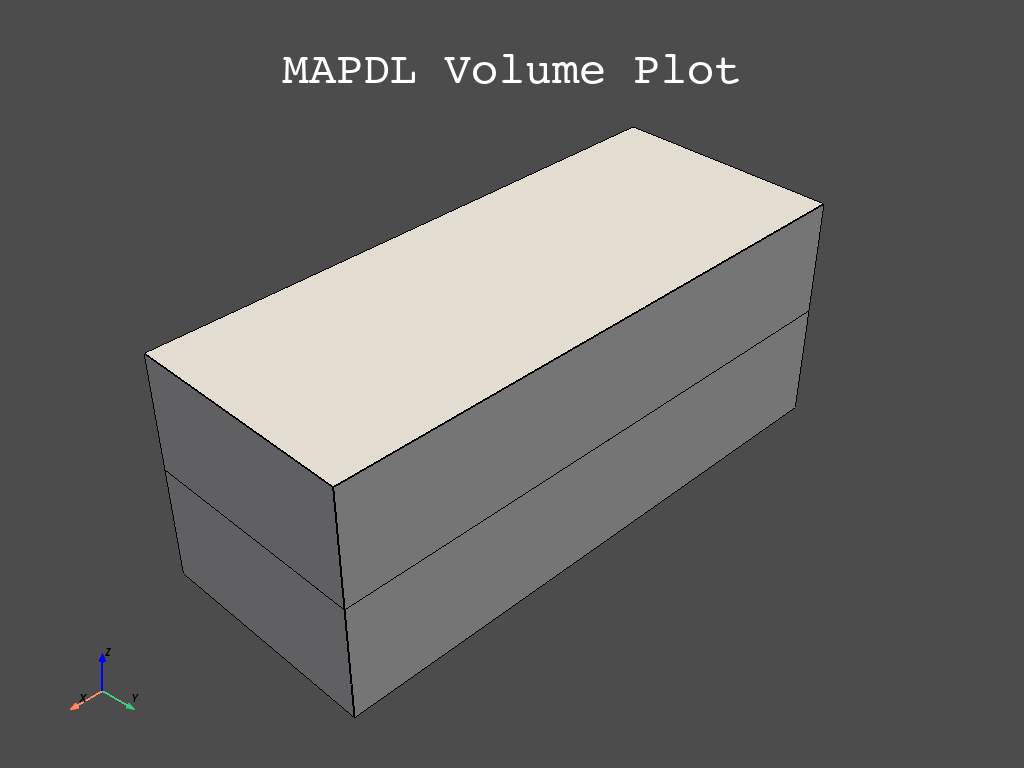

In [34]:
mapdl.cmsel(type_="S", name="PART3", entity="VOLU")
mapdl.cmsel(type_="A", name="PART4", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="VOLU")
mapdl.vplot()

In [35]:
mapdl.cmsel(type_="S", name="PART3", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="AREA")
alist = mapdl.geometry.anum
alist

array([12, 13, 14, 15, 16, 17])

In [34]:
cm1 = "PART3"
cm2 = "PART4"
conta_targ = pre.contact_between_cm(cm1, cm2)

In [35]:
conta_targ

{12: array([18]),
 13: array([21]),
 14: array([20]),
 15: array([19]),
 16: array([], dtype=int32),
 17: array([22])}

In [37]:
conta_targ

{12: array([18]),
 13: array([21]),
 14: array([20]),
 15: array([19]),
 16: array([], dtype=int32),
 17: array([22])}

- Here all parallel area get selected (which are not overlapping too)

- only 17, 22 are overlapping

In [38]:
area1 = list(conta_targ.keys())

In [39]:
area1

[12, 13, 14, 15, 16, 17]

In [40]:
conta_targ[area1[0]]

array([18])

In [37]:
mapdl.db.save("EOF_import.db")

SAVE ALL MODEL, SOLUTION AND POST DATA.

 ALL CURRENT MAPDL DATA WRITTEN TO FILE NAME= EOF_import.db
  FOR POSSIBLE RESUME FROM THIS POINT

## Selection of overlapped area from area pair dictionary

### Case1: when areas overlapping then centroid will match

```python
def check_overlap(anum1, anum2):
    overlap = 0
    eq_area = 0
    
    centroid1, area_val1 = pre.area_cent([anum1])
    centroid2, area_val2 = pre.area_cent([anum2])
    centroid1 = np.array(centroid1)
    centroid2 = np.array(centroid2)
    
    dist = np.linalg.norm(centroid1 - centroid2)
    
    if dist <= 1.0e-3:
        print(f"area overlapping, ccentroid dist: {dist}")
        overlap = 1

    if np.isclose(area_val1, area_val2, rtol=1e-05, atol=1e-08, equal_nan=False):
        eq_area = 1

    return overlap, eq_area
```

In [32]:
anum1 = 17
anum2 = 22
pre.check_overlap(anum1, anum2)

(1, 1)

In [33]:
anum1 = 12
anum2 = 18
pre.check_overlap(anum1, anum2)

(0, 1)

In [36]:
anum1 = 15
anum2 = 19
pre.check_overlap(anum1, anum2)

(0, 1)

### Case2: when areas not overlapping

There will be four cases and in one case area is not overlapping

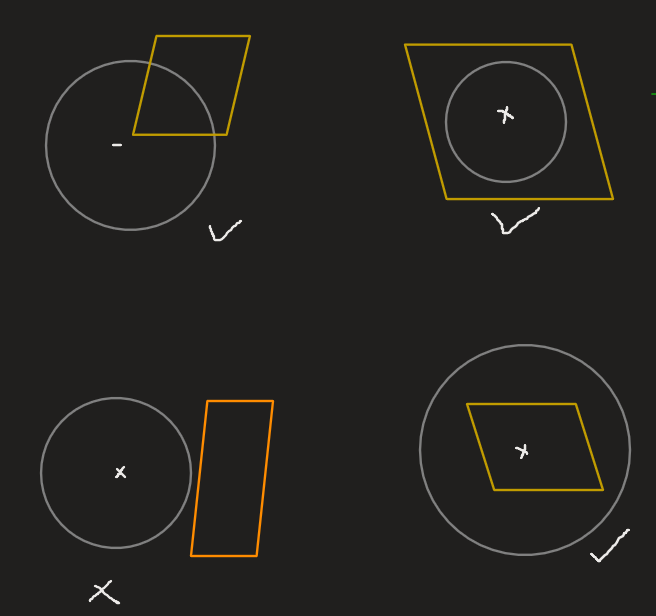

In [38]:
anum1 = 12
anum2 = 18
vector_21_list, max_index = pre.area21_kp_vector(anum1, anum2)

In [39]:
len(vector_21_list)

200

#### vectors from nearest kp of area-2 to all kp of area-1

**Area-1 keypoint coordinate**

---

In [130]:
mapdl.csys(kcn=0)
mapdl.asel("S", "AREA", "", anum1)
mapdl.allsel(labt="BELOW ", entity="AREA")
mapdl.allsel(labt="BELOW ", entity="LINE")
llist1 = mapdl.geometry.lnum
# print(llist)
mapdl.allsel(labt="BELOW ", entity="KP")
klist1 = mapdl.geometry.knum
len(klist1)

65

In [131]:
if len(klist) <= 40:
    for lnum in llist:
        mapdl.ldiv(lnum, ndiv=10)
    llist1 = mapdl.geometry.lnum
    klist1 = mapdl.geometry.knum

kp_coord1 = {}
for kpoiint in klist1:
    k_x = mapdl.queries.kx(kpoiint)
    k_y = mapdl.queries.ky(kpoiint)
    k_z = mapdl.queries.kz(kpoiint)
    k1 = np.array([k_x, k_y, k_z])
    kp_coord1[kpoiint] = k1

centroid1 = pre.area_cent([anum1])

In [135]:
centroid1

array([[-2.50000000e-01,  5.69512672e-18,  1.50000000e-01]])

In [140]:
len(llist1)

65

In [139]:
len(klist1)

65

**Area-2 keypoint coordinate**

---

In [158]:
mapdl.asel("S", "AREA", "", anum2)
mapdl.allsel(labt="BELOW ", entity="AREA")
mapdl.allsel(labt="BELOW ", entity="LINE")
llist2 = mapdl.geometry.lnum
mapdl.allsel(labt="BELOW ", entity="KP")
klist2 = mapdl.geometry.knum
len(klist2)

103

In [159]:
klist2

array([ 25,  26,  29,  30, 218, 219, 220, 221, 222, 223, 224, 225, 226,
       254, 255, 256, 257, 258, 259, 260, 261, 262, 506, 507, 508, 509,
       510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522,
       523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535,
       536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548,
       549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561,
       562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574,
       575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586])

In [146]:
if len(klist2) <= 40:
    for lnum in llist2:
        mapdl.ldiv(lnum, ndiv=10)
    llist = mapdl.geometry.lnum
    klist = mapdl.geometry.knum

kp_coord2 = {}
for kpoiint in klist2:
    k_x = mapdl.queries.kx(kpoiint)
    k_y = mapdl.queries.ky(kpoiint)
    k_z = mapdl.queries.kz(kpoiint)
    k1 = np.array([k_x, k_y, k_z])
    kp_coord2[kpoiint] = k1

centroid1 = pre.area_cent([anum1])

In [147]:
len(klist2)

103

In [103]:
# kp_coord2

In [148]:
kp_list2 = list(kp_coord2.keys())

In [149]:
kp_coord2[kp_list2[0]]

array([-0.25, -0.1 ,  0.1 ])

**Distance between centroid of area-1 and keypoints of area-2**

---

In [150]:
dist_list = []
for kpoint in kp_list2:
    dist = np.linalg.norm(centroid1 - kp_coord2[kpoint])
    dist_list.append(dist)

**Find minimum distance and keypoint number and location**

---

In [152]:
min_value = min(dist_list)
min_value

0.049999999999999975

In [153]:
min_index = dist_list.index(min_value)
min_index

8

In [154]:
dist_list[min_index]

0.049999999999999975

In [161]:
kp_list2[min_index]

222

In [162]:
v0 = kp_coord2[kp_list2[min_index]]

In [163]:
v0

array([-0.25,  0.  ,  0.1 ])

**Create vector from nearest kp of area-2 to kp of area-1**

---

In [168]:
kplist1 = list(kp_coord1.keys())

In [169]:
kp_coord1[kplist1[0]]

array([-0.25,  0.1 ,  0.2 ])

In [170]:
v0 = kp_coord2[kp_list2[min_index]]
vector_21_list = []
for kpn in kplist1:
    v1 = kp_coord1[kpn]
    dir_vec = v1 - v0
    vector_21_list.append(dir_vec)

In [172]:
len(vector_21_list)

65

In [ ]:
len_vector_21_list = [np.linalg.norm(vec) for vec in vector_21_list]
max_value = max(len_vector_21_list)
max_index = dist_list.index(max_value)
len_vector_21_list = len_vector_21_list[max_index: ] + len_vector_21_list[ :max_index]

In [64]:
li = [1,2,3,4,5,6,0,2,3]

m = li.index(max(li))
li = li[m: ] + li[ :m]
# li = li[m: ] + list(reversed(li[ :m]))
li

[6, 0, 2, 3, 1, 2, 3, 4, 5]

In [62]:
list(reversed(li))

[5, 4, 3, 2, 1, 3, 2, 0, 6]

---

**Final Function**

---

```python
# combine all process to make function

def area21_kp_vector(anum1, anum2):
    """
    Calculates the vector from a keypoint in area 1 to the nearest keypoint in area 2.

    Args:
        anum1 (int): The number of area 1.
        anum2 (int): The number of area 2.

    Returns:
        list: A list of vectors from the nearest keypoint in area 2 to the keypoints in area 1.
        max length vector at first position
    """
    
    mapdl.csys(kcn=0)

    # ------- Area-1 & area-2 centroid -------
    centroid1 = pre.area_cent([anum1])[0]
    centroid2 = pre.area_cent([anum2])[0]
    
    # ------- Area-1 keypoints coordinate -------
    mapdl.asel("S", "AREA", "", anum1)
    mapdl.allsel(labt="BELOW ", entity="AREA")
    mapdl.allsel(labt="BELOW ", entity="LINE")
    llist1 = mapdl.geometry.lnum
    mapdl.allsel(labt="BELOW ", entity="KP")
    klist1 = mapdl.geometry.knum
    len(klist1)

    if len(klist1) <= 40:
        for lnum in llist1:
            mapdl.ldiv(lnum, ndiv=10)
        llist1 = mapdl.geometry.lnum
        klist1 = mapdl.geometry.knum

    kp_coord1 = {}
    for kpoiint in klist1:
        k_x = mapdl.queries.kx(kpoiint)
        k_y = mapdl.queries.ky(kpoiint)
        k_z = mapdl.queries.kz(kpoiint)
        k1 = np.array([k_x, k_y, k_z])
        kp_coord1[kpoiint] = k1

    # ------- Area-2 keypoints coordinate -------
    mapdl.asel("S", "AREA", "", anum2)
    mapdl.allsel(labt="BELOW ", entity="AREA")
    mapdl.allsel(labt="BELOW ", entity="LINE")
    llist2 = mapdl.geometry.lnum
    mapdl.allsel(labt="BELOW ", entity="KP")
    klist2 = mapdl.geometry.knum
    len(klist2)

    if len(klist2) <= 40:
        for lnum in llist2:
            mapdl.ldiv(lnum, ndiv=10)
        llist2 = mapdl.geometry.lnum
        klist2 = mapdl.geometry.knum

    kp_coord2 = {}
    for kpoiint in klist2:
        k_x = mapdl.queries.kx(kpoiint)
        k_y = mapdl.queries.ky(kpoiint)
        k_z = mapdl.queries.kz(kpoiint)
        k1 = np.array([k_x, k_y, k_z])
        kp_coord2[kpoiint] = k1

    # ------- Distance between centroid of area-1 and keypoints of area-2 -------
    kp_list2 = list(kp_coord2.keys())
    dist_list = [np.linalg.norm(centroid1 - kp_coord2[kpoint]) for kpoint in kp_list2]
    # Kp of area-2 nearest to area-1
    min_value = min(dist_list)
    # print(min_value)
    min_index = dist_list.index(min_value)
    # print(min_index)
    
    # ------- Coordinate of nearest Kp -------
    v0 = kp_coord2[kp_list2[min_index]]
    # print(v0)
    
    # ------- Create vector from nearest Kp of area-2 to all Kps of area-1 -------
    kplist1 = list(kp_coord1.keys())
    vector_21_list = [kp_coord1[kpn] - v0 for kpn in kplist1]
    # print(len(vector_21_list))

    # -------max length vector at first -------
    len_vector_21_list = [np.linalg.norm(vec) for vec in vector_21_list]
    max_value = max(len_vector_21_list)
    max_index = len_vector_21_list.index(max_value)
    # len_vector_21_list = len_vector_21_list[max_index: ] + len_vector_21_list[ :max_index]
    # # print(len_vector_21_list)
    # vector_21_list = vector_21_list[max_index: ] + vector_21_list[ :max_index]
    
    return vector_21_list, max_index

```

#### Angle between two vectors (0-360 range)

```python
import numpy as np


def vectors_angle_3d(v1, v2):
    """
    Calculate the angle between two vectors for 0 to 360 range.

    Args:
        v1 (list): The first vector.
        v2 (list): The second vector.

    Returns:
        float: The angle between the two vectors in degrees.
    """

    v1_norm = np.linalg.norm(v1)
    v2_norm = np.linalg.norm(v2)
    cos_theta = np.dot(v1, v2) / (v1_norm * v2_norm)
    angle_rad = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    angle_deg = np.degrees(angle_rad)

    cross_product = np.cross(v1, v2)
    print(cross_product)

    if cross_product[2] < 0:
        angle_deg = 360 - angle_deg

    if cross_product[2] == 0 and cross_product[1] < 0:
        angle_deg = 360 - angle_deg

    if cross_product[2] == 0 and cross_product[1] == 0 and cross_product[0] < 0:
        angle_deg = 360 - angle_deg

    return angle_deg

```

#### Vector spread in four coordinates

```python
def vector_spred(vect_list, start_ind):
    v1 = vect_list[start_ind]
    v0_90 = []
    v90_180 = []
    v180_270 = []
    v270_360 = []
    
    angles = []
    for vec in vect_list:
        ang = cd.vectors_angle_3d(v1,vec)
        angles.append(ang)
        if ang<90-1 and ang>0+1: 
            v0_90.append(ang)
        
        if ang<180-1 and ang>90+1: 
            v90_180.append(ang)
        
        if ang<270-1 and ang>180+1: 
            v180_270.append(ang)
        
        if ang<360-1 and ang>270+1: 
            v270_360.append(ang)

    l1 = len(v0_90)
    l2 = len(v90_180)
    l3 = len(v180_270)
    l4 = len(v270_360)

    # print(len(v0_90))
    # print(len(v90_180))
    # print(len(v180_270))
    # print(len(v270_360))
    
    return l1, l2, l3, l4

``

In [49]:
# anum1 = 17
# anum2 = 22

# vect21, max_ind = area21_kp_vector(anum1, anum2)
# print(len(vect21))
# print(max_ind)

In [50]:
# vector_spred(vect21, max_ind)

In [42]:
anum1 = 17
anum2 = 22

vect21, max_ind = pre.area21_kp_vector(anum1, anum2)
print(len(vect21))
print(max_ind)

57
0


In [41]:
cd.vector_spred(vect21, max_ind)

(5, 25, 1, 25)

In [82]:
# len_vector_21_list = [np.linalg.norm(vec) for vec in vect21]
# len_vector_21_list

In [108]:
anum1 = 12
anum2 = 18

vect21, max_ind = area21_kp_vector(anum1, anum2)
print(len(vect21))
print(max_ind)

200
0


{12: array([18]),
 13: array([21]),
 14: array([20]),
 15: array([19]),
 16: array([], dtype=int32),
 17: array([22])}

In [60]:
anum1 = 22
anum2 = 17
vect21, max_ind = area21_kp_vector(anum1, anum2)
# print(len(vect21))
# print(max_ind)
# print()
# v1 = vect21[max_ind]
vector_spred(vect21, max_ind)

(147, 0, 166, 79)

In [48]:
anum1 = 15
anum2 = 19
vect21, max_ind = area21_kp_vector(anum1, anum2)
# print(len(vect21))
# print(max_ind)
# print()
# v1 = vect21[max_ind]
vector_spred(vect21, max_ind)

C:\Users\pramod.kumar\OneDrive - SIEMENSGAMESA\Work\ContactDetect\ContactDetection.py:197: RuntimeWarning: invalid value encountered in scalar divide
  cos_theta = np.dot(v1, v2) / (v1_norm * v2_norm)


(41, 0, 0, 10)

In [51]:
# def check_overlap(anum1, anum2):
#     overlap = 0
#     eq_area = 0
    
#     centroid1, area_val1 = pre.area_cent([anum1])
#     centroid2, area_val2 = pre.area_cent([anum2])
#     centroid1 = np.array(centroid1)
#     centroid2 = np.array(centroid2)
    
#     dist = np.linalg.norm(centroid1 - centroid2)
    
#     if dist <= 1.0e-3:
#         # print(f"area overlapping, ccentroid dist: {dist}")
#         overlap = 1

#     if np.isclose(area_val1, area_val2, rtol=1e-05, atol=1e-08, equal_nan=False):
#         eq_area = 1

#     return overlap, eq_area

## Final form

```python
cm1 = "PART3"
cm2 = "PART4"
conta_targ = pre.contact_between_cm(cm1, cm2)
print(conta_targ)
area1 = list(conta_targ.keys())
# print(area1)
for area_1 in area1:
    for area_2 in conta_targ[area_1]:
        print(area_1,area_2)
        overlap, eq_area = check_overlap(area_1,area_2)

        if overlap == 1:
            if eq_area == 1:
                print(f"Complete overlap {area_1}, {area_2}")
                break
                # pass
            else:
                print(f"centroid overlap ,(not area value) {area_1}, {area_2}")
                

        else:
            vect21, max_ind = area21_kp_vector(anum1, anum2)
            l1,l2,l3,l4 = vector_spred(vect21, max_ind)
            case1 = l1*l2*l3*l4
            vect21, max_ind = area21_kp_vector(anum2, anum1)
            l1,l2,l3,l4 = vector_spred(vect21, max_ind)
            case2 = l1*l2*l3*l4

            if case1==0 and case2==0:
                print(f"no overlap{area_1}, {area_2}")
                
            if case1==1 and case2==0:
                print(f"overlap{area_1}, {area_2}")
                
            if case1==0 and case2==2:
                print(f"overlap{area_1}, {area_2}")


```

In [35]:
def find_contact_area(cm1, cm2):
    
    conta_targ = pre.contact_between_cm(cm1, cm2)
    print(conta_targ)
    area1 = list(conta_targ.keys())
    # print(area1)
    for area_1 in area1:
        for area_2 in conta_targ[area_1]:
            print(area_1,area_2)
            overlap, eq_area = pre.check_overlap(area_1,area_2)
    
            if overlap == 1:
                if eq_area == 1:
                    print(f"Complete overlap {area_1}, {area_2}")
                    break
                    # pass
                else:
                    print(f"centroid overlap ,(not area value) {area_1}, {area_2}")
                    
    
            else:
                vect21, max_ind = pre.area21_kp_vector(area_1,area_2)
                l1,l2,l3,l4 = cd.vector_spred(vect21, max_ind)
                case1 = l1*l2*l3*l4
                
                vect21, max_ind = pre.area21_kp_vector(area_1,area_2)
                l1,l2,l3,l4 = cd.vector_spred(vect21, max_ind)
                case2 = l1*l2*l3*l4
    
                if case1==0 and case2==0:
                    print(f"no overlap{area_1}, {area_2}")
                    
                if case1==1 and case2==0:
                    print(f"overlap{area_1}, {area_2}")
                    
                if case1==0 and case2==2:
                    print(f"overlap{area_1}, {area_2}")
                

C:\Users\pramod.kumar\PythonEnv\myenv\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame_vtk.tools'

Falling back to a static output.
  warnings.warn(


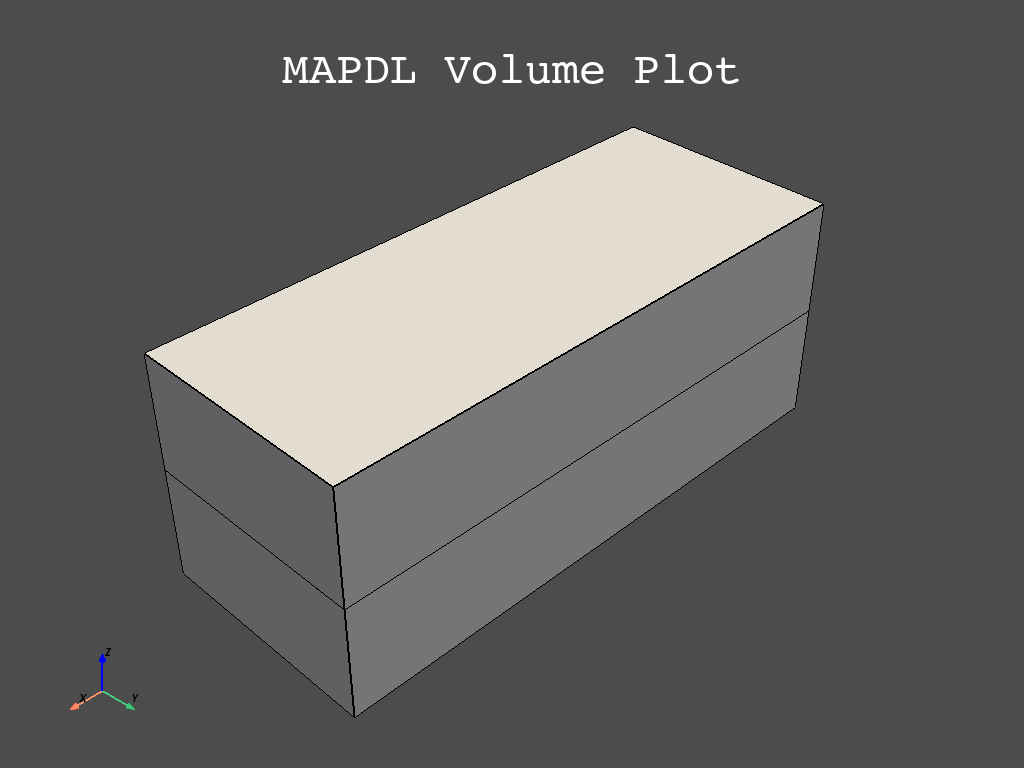

In [33]:
mapdl.cmsel(type_="S", name="PART3", entity="VOLU")
mapdl.cmsel(type_="A", name="PART4", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="VOLU")
mapdl.vplot()

In [36]:
cm1 = "PART3"
cm2 = "PART4"
find_contact_area(cm1, cm2)

{12: array([18]), 13: array([21]), 14: array([20]), 15: array([19]), 16: array([], dtype=int32), 17: array([22])}
12 18
no overlap12, 18
13 21


C:\Users\pramod.kumar\OneDrive - SIEMENSGAMESA\Work\ContactDetect\ContactDetection.py:197: RuntimeWarning: invalid value encountered in scalar divide
  cos_theta = np.dot(v1, v2) / (v1_norm * v2_norm)


no overlap13, 21
14 20
no overlap14, 20
15 19
no overlap15, 19
17 22
Complete overlap 17, 22


C:\Users\pramod.kumar\PythonEnv\myenv\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame_vtk.tools'

Falling back to a static output.
  warnings.warn(


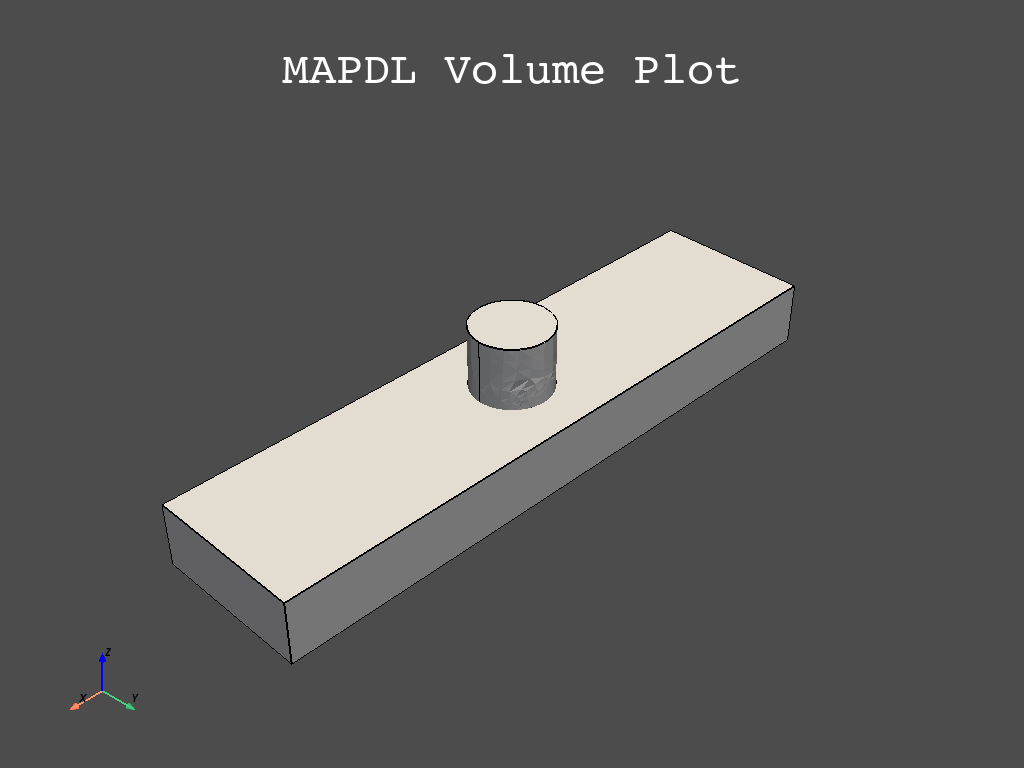

In [76]:
mapdl.cmsel(type_="S", name="PART2", entity="VOLU")
mapdl.cmsel(type_="A", name="PART1", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="VOLU")
mapdl.vplot()

In [37]:
cm1 = "PART1"
cm2 = "PART2"
find_contact_area(cm1, cm2)

{1: array([], dtype=int32), 2: array([], dtype=int32), 3: array([], dtype=int32), 4: array([ 5, 10])}
4 5
Complete overlap 4, 5


In [84]:
pre.area_cent([4])[1]-pre.area_cent([5])[1]

1.3960599999998397e-07

In [ ]:
area_cent

C:\Users\pramod.kumar\PythonEnv\myenv\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame_vtk.tools'

Falling back to a static output.
  warnings.warn(


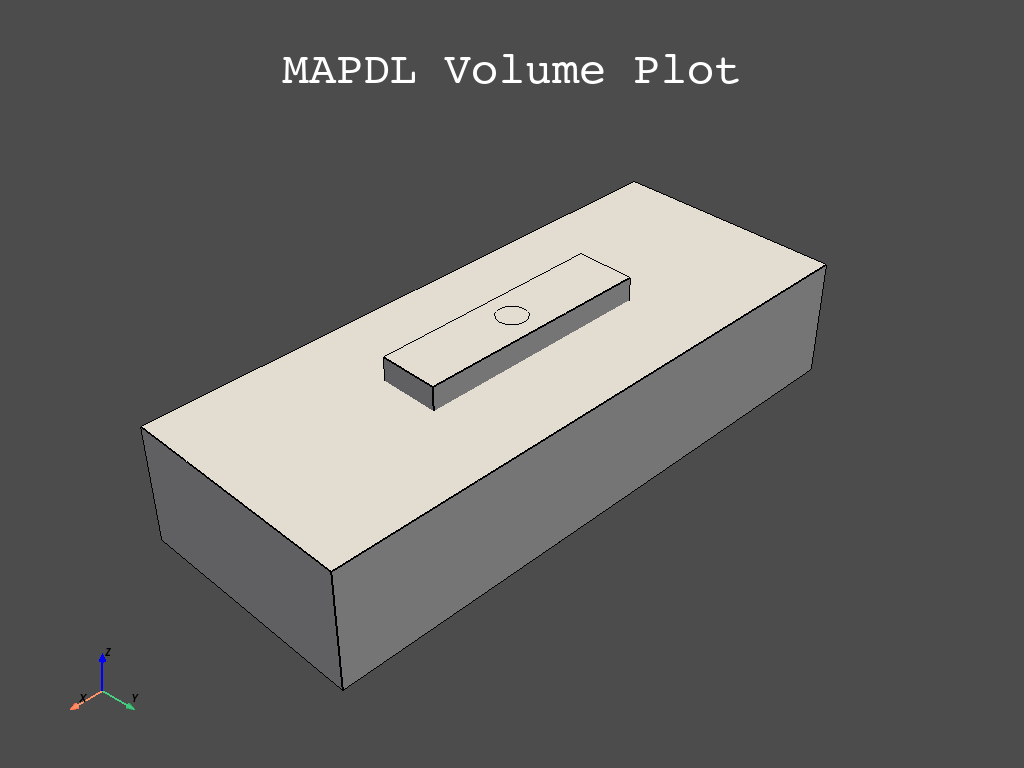

In [65]:
mapdl.cmsel(type_="S", name="PART2", entity="VOLU")
mapdl.cmsel(type_="A", name="PART3", entity="VOLU")
mapdl.allsel(labt="BELOW ", entity="VOLU")
mapdl.vplot()

In [38]:
cm1 = "PART2"
cm2 = "PART3"
find_contact_area(cm1, cm2)

{5: array([], dtype=int32), 6: array([], dtype=int32), 7: array([], dtype=int32), 8: array([], dtype=int32), 9: array([], dtype=int32), 10: array([], dtype=int32), 11: array([16])}
11 16
centroid overlap ,(not area value) 11, 16


In [85]:
mapdl.exit()